# Semi-Markov Chain Model for Building Occupancy

## Introduction

In this tutorial, we will introduce and model a semi-Markov Chain for building occupancy using example data. A semi-Markov Chain is a generalization of the standard Markov Chain that allows for sojourn times (the time spent in a state) to follow an arbitrary distribution, rather than the geometric distribution assumed in standard Markov Chains.

### Semi-Markov Chain Model

A semi-Markov Chain is defined by:
- A finite set of states $ S = {s_1, s_2, \ldots, s_n} $
- A state transition probability matrix $( P )$, where $( P_{ij} )$ is the probability of transitioning from state $( s_i )$ to state $( s_j )$
- A sojourn time distribution $ T_i(t) $ for each state $( s_i )$, representing the probability of staying in state $( s_i )$ for time $( t )$

In standard Markov Chains, the state transitions are memoryless and only depend on the current state. However, in semi-Markov Chains, the next state transition depends on both the current state and the elapsed time since entering that state.

### Objective

We will model building occupancy using a semi-Markov Chain to better capture the time-dependent behavior of occupants. We will:
1. Generate example data of building occupancy transitions.
2. Fit a semi-Markov Chain model to the data.
3. Visualize the model and the occupancy patterns.

Let's get started!

## Step-by-Step Implementation

1. **Import Necessary Libraries**
2. **Generate Example Data**
3. **Fit a Semi-Markov Chain Model**
4. **Visualize the Results**

## Step 1: Import Necessary Libraries


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, weibull_min


## Step 2: Generate Example Data

We will generate synthetic data for building occupancy transitions. Assume the building has three states: 'Empty', 'Few Occupants', and 'Full'.


In [5]:
# Define states
states = ['Empty', 'Few', 'Full']
state_dict = {state: idx for idx, state in enumerate(states)}

# Define transition probabilities
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.6, 0.1],
    [0.2, 0.3, 0.5]
])

# Define sojourn time distributions
sojourn_params = {
    'Empty': {'scale': 1.0},  # Exponential distribution with mean 1
    'Few': {'c': 2, 'scale': 1.0},  # Weibull distribution with k=2, scale=1
    'Full': {'c': 2, 'scale': 2.0}   # Weibull distribution with k=2, scale=2
}

# Generate example data
np.random.seed(42)
num_samples = 1000
sequence = []
current_state = 'Empty'
time = 0

for _ in range(num_samples):
    sequence.append((time, current_state))
    
    if current_state == 'Empty':
        sojourn_time = expon.rvs(**sojourn_params['Empty'])
    else:
        sojourn_time = weibull_min.rvs(**sojourn_params[current_state])
    
    time += sojourn_time
    next_state_prob = P[state_dict[current_state]]
    next_state = np.random.choice(states, p=next_state_prob)
    current_state = next_state

# Convert to NumPy array for easier manipulation
sequence = np.array(sequence, dtype=object)

## Step 3: Fit a Semi-Markov Chain Model

We will fit a semi-Markov Chain model to the generated data. This involves estimating the transition probabilities and the sojourn time distributions.


In [6]:
# Estimate transition probabilities
transition_counts = np.zeros((len(states), len(states)))

for i in range(1, len(sequence)):
    current_state = sequence[i-1, 1]
    next_state = sequence[i, 1]
    transition_counts[state_dict[current_state], state_dict[next_state]] += 1

transition_prob = transition_counts / transition_counts.sum(axis=1, keepdims=True)

# Estimate sojourn time distributions
sojourn_times = {state: [] for state in states}

for i in range(1, len(sequence)):
    current_state = sequence[i-1, 1]
    sojourn_time = sequence[i, 0] - sequence[i-1, 0]
    sojourn_times[current_state].append(sojourn_time)

sojourn_distributions = {}
for state in states:
    if state == 'Empty':
        params = expon.fit(sojourn_times[state])
        sojourn_distributions[state] = expon(*params)
    else:
        params = weibull_min.fit(sojourn_times[state])
        sojourn_distributions[state] = weibull_min(*params)

## Step 4: Visualize the Results

We will visualize the transition probability matrix and the sojourn time distributions.


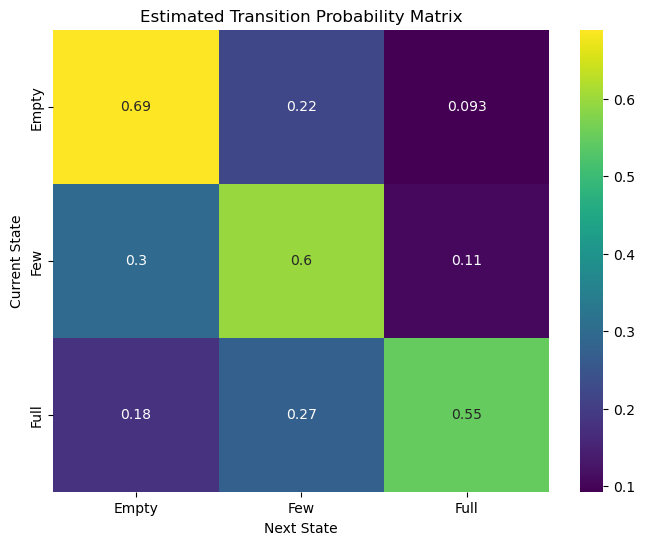

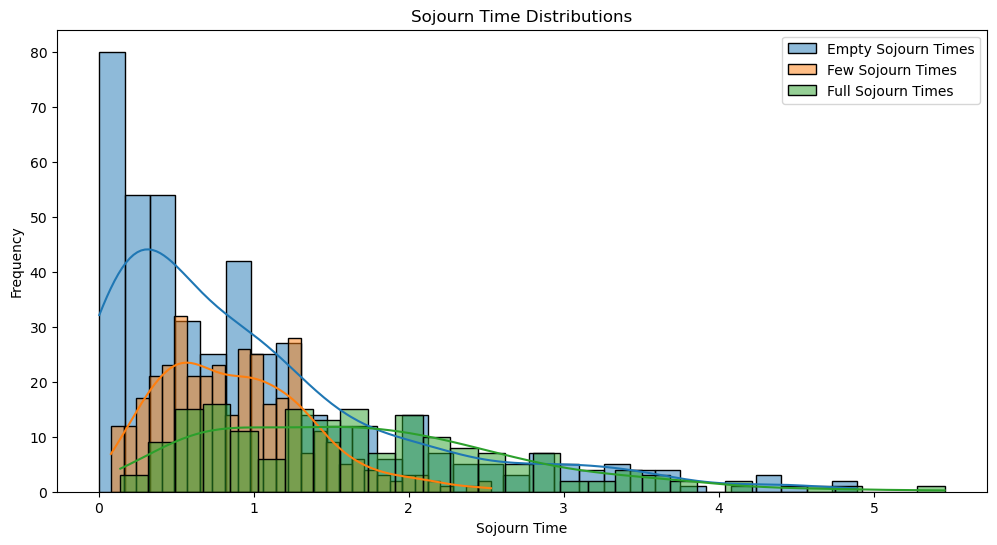

In [7]:
# Plot transition probability matrix
plt.figure(figsize=(8, 6))
sns.heatmap(transition_prob, annot=True, cmap='viridis', xticklabels=states, yticklabels=states)
plt.title("Estimated Transition Probability Matrix")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()

# Plot sojourn time distributions
plt.figure(figsize=(12, 6))
for state in states:
    sns.histplot(sojourn_times[state], bins=30, kde=True, label=f'{state} Sojourn Times')

plt.title("Sojourn Time Distributions")
plt.xlabel("Sojourn Time")
plt.ylabel("Frequency")
plt.legend()
plt.show()



## Conclusion

In this tutorial, we introduced semi-Markov Chain models and demonstrated how to model building occupancy using such models. We generated example data, estimated the transition probabilities and sojourn time distributions, and visualized the results.

Semi-Markov Chains provide a more realistic representation of systems with time-dependent behavior, making them useful for various applications beyond building occupancy modeling.

Happy modeling!

